# Prepare the data

In [8]:
!git clone "https://github.com/hungngocphat01/love-live-bh-regression"
%cd "love-live-bh-regression"

fatal: destination path 'love-live-bh-regression' already exists and is not an empty directory.
/content/love-live-bh-regression


In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.ioff()

# Define utility function(s)

In [17]:
IMAGE_FOLDER = "images/"

def getImage(path):
    return OffsetImage(plt.imread(IMAGE_FOLDER + path), zoom=0.15)

# Extract breast and hip info

In [19]:
breast = []
hip = []
image = []
with open("data.csv", mode="rt") as f:
    df = csv.DictReader(f)
    
    for row in df:
        breast.append(int(row["BREAST"]))
        hip.append(int(row["HIP"]))
        image.append(row["NAME"] + ".jpg")

# Draw the data points and the linear regression line: $y=ax+b$
Where $x := \text{hip size}$, $y := \text{breast size}$

Linear regression equation: y=1.3697916666666659x + -31.368055555555515


[]

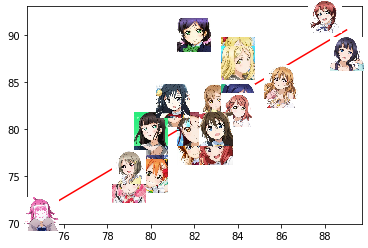

In [23]:
# Plot the data points
fig, ax = plt.subplots()
ax.scatter(hip, breast)

for x0, y0, path in zip(hip, breast, image):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

# Plot the regression line
lin = np.polyfit(hip, breast, 1)
X = np.linspace(min(hip), max(hip), 10)
a, b = lin[0], lin[1]
Y = a*X + b
equation = "y={0}x + {1}".format(str(a), str(b))
plt.plot(X, Y, "-r", label=equation)
print("Linear regression equation: {0}".format(equation))

plt.plot()